# Clustering embeddings

**Goal**: we want to assign embeddings to a small number of clusters that can be used as tokens for training the sequence model.

### Questions 
- how well does dimensionality reduction retain the signal from the embeddings?
- how does is this clustering method affected by data drift (emergence of new clusters) in comparison to the fibonacci spirals?


In [1]:
from pop2vec.clustering.core import estimate_and_evaluate
from pop2vec.clustering.utils import create_fake_embs
from sklearn.cluster import KMeans, AgglomerativeClustering


In [6]:
n_true_clusters = 300
N = 5_000
n_clusters = 100
embs = create_fake_embs(n=N, n_clusters=n_true_clusters)
embs.head()


rinpersoon_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16,emb_17,emb_18,emb_19,emb_20,emb_21,emb_22,emb_23,emb_24,emb_25,emb_26,emb_27,emb_28,emb_29,emb_30,emb_31,emb_32,emb_33,emb_34,emb_35,…,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98,emb_99,emb_100,emb_101,emb_102,emb_103,emb_104,emb_105,emb_106,emb_107,emb_108,emb_109,emb_110,emb_111,emb_112,emb_113,emb_114,emb_115,emb_116,emb_117,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
8.141778e7,1.229683,-2.884742,-0.627188,-3.000336,-1.33101,-0.284288,-1.467119,-1.964953,0.591981,-1.538423,-0.864346,0.991911,-1.553294,-0.266702,-0.495161,0.044237,0.392246,-1.528804,-0.044997,0.766019,0.49966,1.954189,2.056874,0.201941,-1.087333,1.16677,-0.277406,-0.788981,1.844118,-1.438183,-0.545228,-1.25995,-1.931604,-2.030945,-1.542851,-1.471561,…,-0.706592,-1.801725,0.526189,0.916685,0.572858,-1.015198,-0.920312,-1.707969,-4.160855,0.687741,-0.091119,0.586425,2.209961,1.796503,-1.440376,-1.881953,-0.571327,2.271831,0.281385,0.52344,1.741186,-2.54398,0.239332,-1.547865,-0.082088,0.042024,0.986231,-0.85885,0.840972,0.681208,2.424056,2.042055,0.376142,0.743552,2.280967,0.83703,-2.343658
4.7118571e7,-0.386284,3.572326,1.464653,0.932586,-0.92982,2.415211,-0.289718,-3.013326,0.621684,-1.353992,0.968346,1.253277,0.549933,-0.680992,-0.96017,1.14659,-0.157918,1.420941,-1.252482,-0.131341,0.11625,0.490043,-0.044538,0.33407,-0.238292,0.383795,1.850886,0.326862,0.174289,-1.45608,-0.96393,-0.02241,-0.285157,0.594811,-0.548585,2.019699,…,1.552365,0.002705,0.055384,0.714495,-3.288741,-3.145239,-0.151596,1.172588,-0.435087,-2.030097,1.415011,-2.000674,1.079876,0.538443,0.155494,-2.113329,-2.537093,1.088334,-1.1058,-2.333456,-0.059115,0.109464,0.712093,0.776508,4.202991,0.104509,0.120205,2.237875,-0.319102,-0.512548,-0.264834,-0.421358,-1.898458,0.550037,1.846885,0.11421,-1.400569
7.7205029e7,-0.687331,2.163953,-0.220219,0.632431,2.262585,2.291466,-0.839184,1.38505,-1.738332,-1.175874,-0.254226,-2.927984,0.361598,-0.928365,-0.541948,0.122614,0.957898,-3.342528,-1.935235,-0.255398,-1.233298,1.304146,1.142333,0.74495,-1.038482,-3.682833,0.202995,-1.359258,1.622389,-0.448277,-0.369004,-1.287536,-2.901319,-1.040032,-3.049196,-0.95399,…,-0.578093,-3.598747,-0.089208,1.693154,0.592434,0.19002,0.416294,1.216505,-1.586449,2.444387,-3.589289,0.656711,0.113475,0.855519,-1.197524,-0.757668,-1.432138,0.266569,-0.126049,3.087531,-0.399867,1.045639,1.845716,-0.628192,-1.177489,-0.064157,-1.439511,0.968474,1.990549,-1.209667,0.794813,0.398035,0.394861,0.956553,-1.287501,0.130242,-1.864874
2.0011791e7,-2.303783,-0.323093,-1.261272,1.260144,-1.163323,-1.184518,0.27485,-0.295935,-0.286366,-0.013991,-1.107429,-3.08442,-0.197696,0.162307,-1.114645,0.142093,-1.396945,0.843336,-0.913107,2.816953,1.044112,3.3537,-0.331354,0.3412,-1.777966,2.165773,-0.720099,-0.999049,-1.883811,-0.293147,0.856702,-0.245911,0.010279,2.660022,-0.251526,0.841051,…,1.672735,3.090921,0.002238,-0.853012,-0.987592,0.665319,1.712121,-1.345102,-1.325865,0.311226,-0.631976,-1.331587,-1.137572,0.185742,-1.675734,-0.649737,-2.107315,0.434479,2.456209,-0.208508,-0.072301,-1.277192,-0.974953,-2.217501,-1.358751,2.07601,-0.033678,-1.036387,-0.10068,-0.901868,-1.719764,-1.068393,-0.285794,-0.651684,0.156269,-0.487659,-0.144488
4.6796928e7,-0.255231,0.793258,-0.799502,0.879943,-1.029697,1.964702,0.526804,3.922906,-1.960197,-0.297945,0.880998,2.35289,0.303002,0.180399,1.345023,0.727498,-1.186802,-3.708139,-2.847426,-0.068889,-0.03487,1.684726,-1.306671,-3.467983,0.195087,1.768182,0.028924,2.827759,0.905677,0.992065,-0.719777,1.293517,-2.260887,-0.670132,0.13872,-1.76

/home/flavio/repositories/projects/odissei-life2vec/life-sequencing-dutch/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/flavio/repositories/projects/odissei-life2vec/life-sequencing-dutch/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/flavio/repositories/projects/odissei-life2vec/life-sequencing-dutch/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


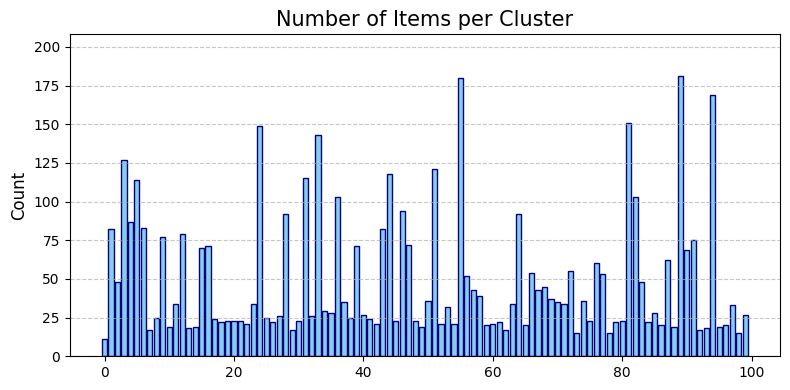

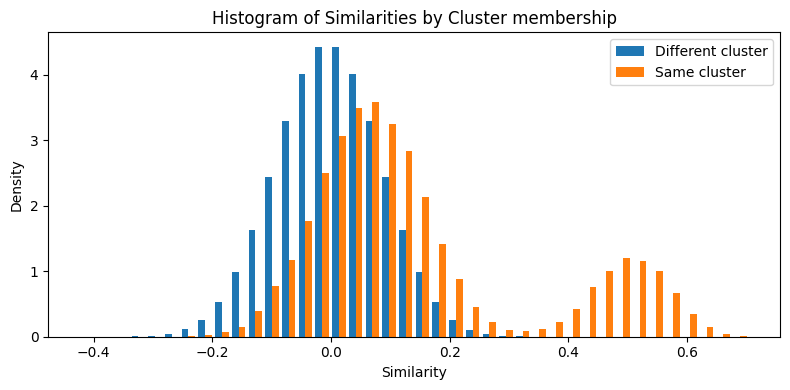

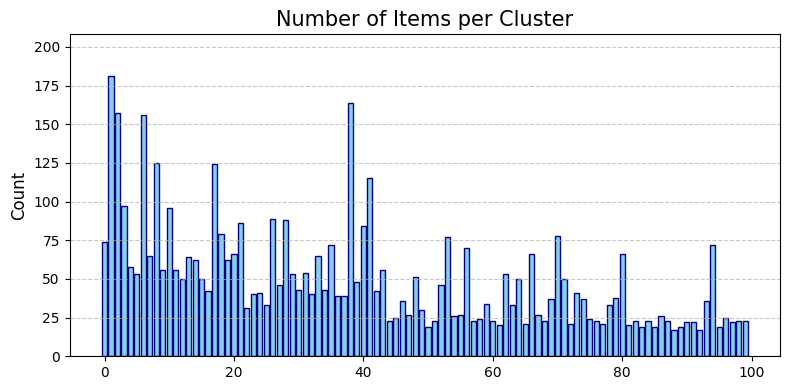

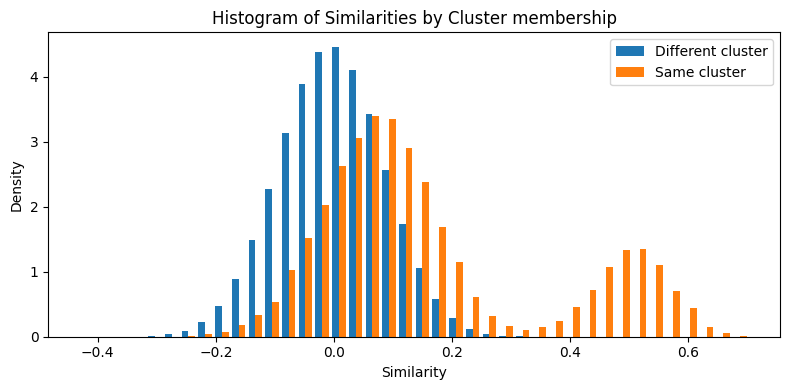

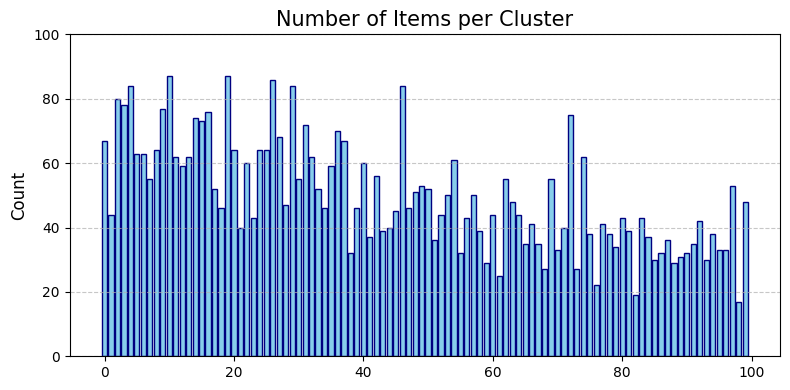

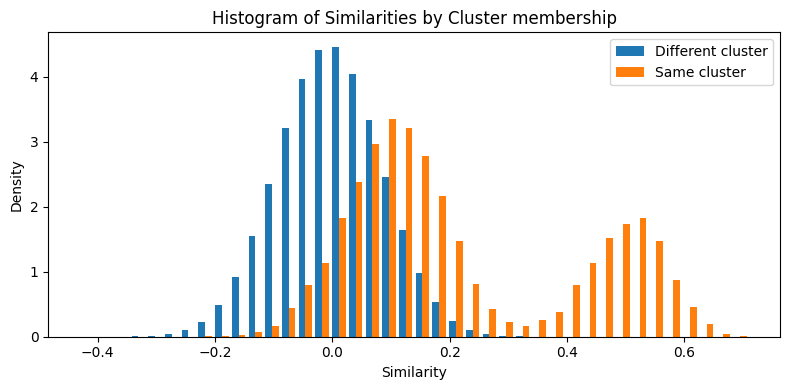

In [3]:
input_map = {
    "kmeans": KMeans(random_state=0, n_init="auto"),
    "agglom_base": AgglomerativeClustering(),
    "agglom_cosine": AgglomerativeClustering(metric="cosine", linkage="average"),
}
results = {}
for name, estimator in input_map.items():
    results[name] = estimate_and_evaluate(name, estimator, embs, n_clusters) 


In [4]:
[(k, v["scores"]) for k,v in results.items()]

[('kmeans',
  {'silhouette': 0.09724115730980616,
   'calinski_harabasz': 15.767467773053886,
   'davies_bouldin': 2.975384635862684}),
 ('agglom_base',
  {'silhouette': 0.11838365951800722,
   'calinski_harabasz': 17.157001277485765,
   'davies_bouldin': 2.9676492156960945}),
 ('agglom_cosine',
  {'silhouette': 0.13795645189465994,
   'calinski_harabasz': 16.4145099213589,
   'davies_bouldin': 2.828042835640053})]

### Summary
- agglomerative yields more equal-sized clusters
- little difference is closeness to own centroid
- the bivariate distributions are indicative of how well spatial information from original embeddings is preserved by clustering
- scoring metrics do not necessarily agree

To do next
- [x] look at bivariate distributions of cosine distances between units in same and different clusters
- [ ] ~~predict defining features of the network: municipality id? -> for clustering id, use the majority class or something?~~
- [ ] ~~spearman's rank correlation between the cluster centroid coordinates and the person coordinates~~
- [ ] make agglomerative more robust / use distance-specific stopping rule instead of hard-coded n clusters?

In [5]:
# TODO: use embs etc more consistently
# TODO: avoid copy from polars to numpy?
# TODO: add here the code to create the pairwise distributions and any further code
# TODO: update path for saving figures
# TODO: how do we run predict on new data? -> kmeans better? or use nearestcentroid?